In [1]:
# Import libraries to be used
import pandas as pd
import numpy as np
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from datetime import *
import datetime as dt
from matplotlib.ticker import MaxNLocator
import regex
import emoji
from seaborn import *
#from heatmap import heatmap
from wordcloud import WordCloud , STOPWORDS , ImageColorGenerator
from nltk import *
from plotly import express as pxv

In [48]:
#import the file
df = pd.read_csv("whatsapp.csv")

In [49]:
df.head(15)#top 15 entries

,Date,time,am-pm,author,message,emoji
0,17-11-21,5:57,pm,Dakshayini Rnsit,Naale yar aadru clg ge barteera,NaN
1,17-11-21,5:58,pm,Ranjitha Rnsit,I'm not coming,NaN
2,17-11-21,5:58,pm,Dakshayini Rnsit,Others,NaN
3,17-11-21,5:59,pm,Lavanya Rnsit,Same hete,NaN
4,17-11-21,6:01,pm,Sushma Rnsit,Baralla,NaN
5,17-11-21,6:05,pm,Rakshita RNSIT,Same,NaN
6,17-11-21,7:03,am,Lavanya Rnsit,Pakka barala,NaN
7,17-11-21,7:03,am,Lavanya Rnsit,Alva,NaN
8,17-11-21,7:03,am,Lavanya Rnsit,Yarunu,NaN
9,17-11-21,7:03,am,Lavanya Rnsit,NaN,😬


In [50]:
#data cleaning
print(df.isna().sum())
#to fill null message values
df['message'].value_counts().index[0]#to get mode values in FuelType
df['message'].fillna(df['message'].value_counts().index[0],inplace=True)
df['emoji'].value_counts().index[0]#to get mode values in FuelType
df['emoji'].fillna(df['emoji'].value_counts().index[0],inplace=True)
print(df.isna().sum())
df.head()

Date         0
time         0
am-pm        0
author       0
message     74
emoji      632
dtype: int64
Date       0
time       0
am-pm      0
author     0
message    0
emoji      0
dtype: int64


,Date,time,am-pm,author,message,emoji
0,17-11-21,5:57,pm,Dakshayini Rnsit,Naale yar aadru clg ge barteera,😂
1,17-11-21,5:58,pm,Ranjitha Rnsit,I'm not coming,😂
2,17-11-21,5:58,pm,Dakshayini Rnsit,Others,😂
3,17-11-21,5:59,pm,Lavanya Rnsit,Same hete,😂
4,17-11-21,6:01,pm,Sushma Rnsit,Baralla,😂


In [51]:
#number of images shared
media_messages = df[df['message'] == '<Media omitted>'].shape[0]
print("Total Number of media file :",media_messages)
#number of message that deleted
deleted_messages = df[df['message'] == 'This message was deleted'].shape[0]
print("\nTotal Number of Deleted messages :",deleted_messages)

Total Number of media file : 121

Total Number of Deleted messages : 7


In [52]:
#to convert date object into date datatype
print(df.dtypes)
df['Date']=pd.to_datetime(df.Date)
df.dtypes

Date       object
time       object
am-pm      object
author     object
message    object
emoji      object
dtype: object


Date       datetime64[ns]
time               object
am-pm              object
author             object
message            object
emoji              object
dtype: object

In [53]:
#Extract weekday from Date Column
#df['weekday']=pd.DatetimeIndex(df.Date).weekday
df['Day']=df.Date.dt.strftime("%A")
df

,Date,time,am-pm,author,message,emoji,Day
0,2021-11-17,5:57,pm,Dakshayini Rnsit,Naale yar aadru clg ge barteera,😂,Wednesday
1,2021-11-17,5:58,pm,Ranjitha Rnsit,I'm not coming,😂,Wednesday
2,2021-11-17,5:58,pm,Dakshayini Rnsit,Others,😂,Wednesday
3,2021-11-17,5:59,pm,Lavanya Rnsit,Same hete,😂,Wednesday
4,2021-11-17,6:01,pm,Sushma Rnsit,Baralla,😂,Wednesday
...,...,...,...,...,...,...,...
766,2022-11-01,6:05,pm,Lavanya Rnsit,<Media omitted>,👍😁,Tuesday
767,2022-11-01,6:06,pm,Nimisha,Nale kalsbodu may be complete admele,😂,Tuesday
768,2022-11-01,6:06,pm,Lavanya Rnsit,Hu nale mugiyuthe 5th module,😂,Tuesday
769,2022-11-01,6:07,pm,Dakshayini Rnsit,Hu aaga baribeku,😂,Tuesday


In [54]:
### Counting number of letters in each message
df['Letter''s'] = df['message'].apply(lambda s : len(s))
### Counting number of word's in each message
df['Word''s'] = df['message'].apply(lambda s : len(s.split(' ')))
### Function to count number of links in dataset, it will add extra column and store information in it.
MEDIAPATTERN = r'<Media omitted>'
df['Media_Count'] = df.message.apply(lambda x : re.findall(MEDIAPATTERN, x)).str.len()
media = np.sum(df.Media_Count)
### Looking updated dataset
df

,Date,time,am-pm,author,message,emoji,Day,Letters,Words,Media_Count
0,2021-11-17,5:57,pm,Dakshayini Rnsit,Naale yar aadru clg ge barteera,😂,Wednesday,31,6,0
1,2021-11-17,5:58,pm,Ranjitha Rnsit,I'm not coming,😂,Wednesday,14,3,0
2,2021-11-17,5:58,pm,Dakshayini Rnsit,Others,😂,Wednesday,6,1,0
3,2021-11-17,5:59,pm,Lavanya Rnsit,Same hete,😂,Wednesday,9,2,0
4,2021-11-17,6:01,pm,Sushma Rnsit,Baralla,😂,Wednesday,7,1,0
...,...,...,...,...,...,...,...,...,...,...
766,2022-11-01,6:05,pm,Lavanya Rnsit,<Media omitted>,👍😁,Tuesday,15,2,1
767,2022-11-01,6:06,pm,Nimisha,Nale kalsbodu may be complete admele,😂,Tuesday,36,6,0
768,2022-11-01,6:06,pm,Lavanya Rnsit,Hu nale mugiyuthe 5th module,😂,Tuesday,28,5,0
769,2022-11-01,6:07,pm,Dakshayini Rnsit,Hu aaga baribeku,😂,Tuesday,16,3,0


In [81]:
#top 10 emojis used in group
em=pd.DataFrame(df.emoji.value_counts())
em.head(10)

,emoji
😂,652
😂😂,11
🤣,9
😊,8
🤦‍♀️,7
👍,6
🙆‍♀️,5
✋🏻,4
😅,3
🙏,3


In [82]:
l = df.author.unique()
for i in range(len(l)):
  ### Filtering out messages of particular user
  req_df = df[df["author"] == l[i]]
  ### req_df will contain messages of only one particular user
  print(f'--> Stats of {l[i]} <-- ')
  ### shape will print number of rows which indirectly means the number of messages
  print('Total Message Sent : ', req_df.shape[0])
  ### Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word''s']))/req_df.shape[0]
  w_p_m = ("%.3f" % round(words_per_message, 2))  
  print('Average Words per Message : ', w_p_m)
  ### media conists of media messages
  media = sum(req_df["Media_Count"])
  print('Total Media Message Sent : ', media)   
  print()
  print('************************************************')

--> Stats of Dakshayini Rnsit <-- 
Total Message Sent :  85
Average Words per Message :  3.520
Total Media Message Sent :  10

************************************************
--> Stats of Ranjitha Rnsit <-- 
Total Message Sent :  78
Average Words per Message :  4.940
Total Media Message Sent :  9

************************************************
--> Stats of Lavanya Rnsit <-- 
Total Message Sent :  214
Average Words per Message :  2.630
Total Media Message Sent :  50

************************************************
--> Stats of Sushma Rnsit <-- 
Total Message Sent :  24
Average Words per Message :  4.290
Total Media Message Sent :  5

************************************************
--> Stats of Rakshita RNSIT <-- 
Total Message Sent :  38
Average Words per Message :  4.180
Total Media Message Sent :  7

************************************************
--> Stats of Nimisha <-- 
Total Message Sent :  151
Average Words per Message :  5.250
Total Media Message Sent :  22

**************

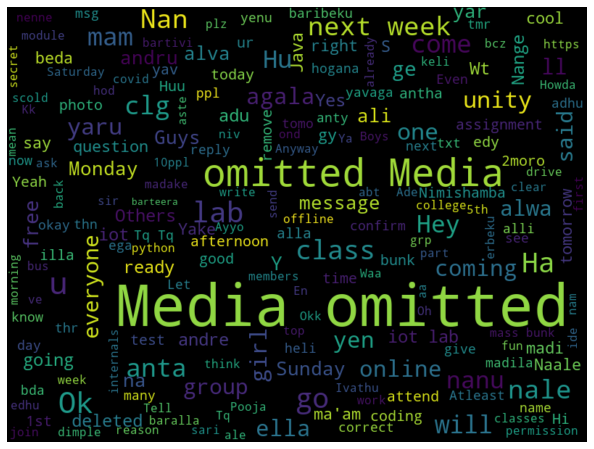

In [83]:
### Word Cloud of mostly used word in our Group
text = " ".join(review for review in df.message)
wordcloud = WordCloud(width = 800, height = 600, 
                background_color ='black',  
                min_font_size = 8).generate(text)
  ### Display the generated image:
plt.figure( figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [84]:
df.author.value_counts()#total message according to author

Lavanya Rnsit       214
Nimisha             151
Dakshayini Rnsit     85
Ranjitha Rnsit       78
Pooja Rnsit          74
Rakshita RNSIT       38
Gowtami Rnsit        33
Pavitra Rnsit        30
Sushma Rnsit         24
Lekha Rnsit          18
Pragati Rnsit        17
Dimple Rnsit          9
Name: author, dtype: int64

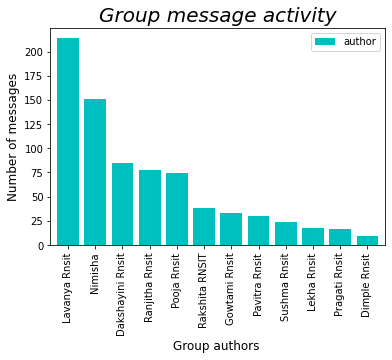

In [85]:
#Group activity by authors
df.author.value_counts().plot(kind='bar',color='c',width=0.8)
plt.xlabel("Group authors ",fontsize=12)#label for each line
plt.ylabel( "Number of messages",fontsize=12)
plt.title("Group message activity",fontsize=20,fontstyle="italic")
plt.legend(loc=1)

pm    562
am    209
Name: am-pm, dtype: int64


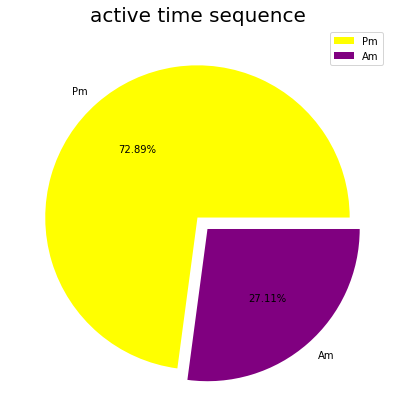

In [86]:
print(df['am-pm'].value_counts())
#pie chart
plt.figure(figsize=(7,7))#size of the pie chart
cols=['yellow','purple']
s=df['am-pm'].value_counts()
lab=['Pm','Am']
plt.pie(s,labels=lab,colors=cols,autopct="%1.2f%%",explode=(0,0.1))
plt.title('active time sequence',fontsize=20)#title of graph
plt.legend(loc=1)


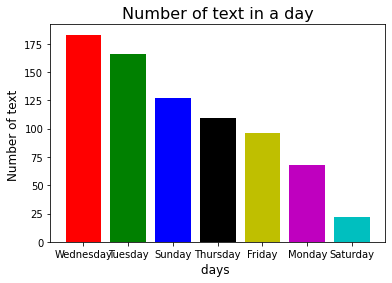

In [87]:
#Group activity Number of text in each day
demo=dict(df.Day.value_counts())
k=list(demo.keys())
v=list(demo.values())
c=list('rgbkymc')
plt.xlabel("days ",fontsize=12)#label for each line
plt.ylabel("Number of text ",fontsize=12)
plt.title('Number of text in a day',fontsize=16)#title of graph
plt.bar(k,v,color=c,width=0.8)
plt.show()#to show the graph

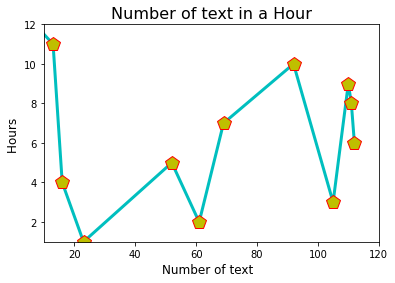

In [80]:
df['hour']=pd.DatetimeIndex(df.time).hour
hr=dict(df.hour.value_counts())
x=hr.keys()
y=hr.values()
ax=plt.axes()
plt.xlabel("Number of text  ",fontsize=12)#label for each line
plt.ylabel("Hours ",fontsize=12)
plt.title('Number of text in a Hour',fontsize=16)#title of graph
ax.plot(y,x,'-p',color="c",markersize=15,linewidth=3,markeredgecolor='r',markerfacecolor='y')
plt.xlim(10,120)
plt.ylim(1,12)
plt.show()#to show the graph